In [48]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Get Data

In [49]:
data = pd.read_csv("initial_data.csv")


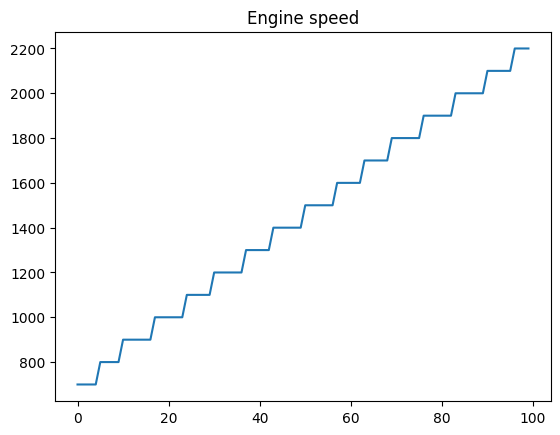

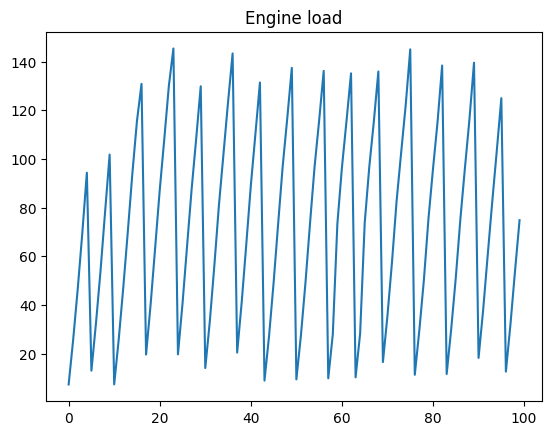

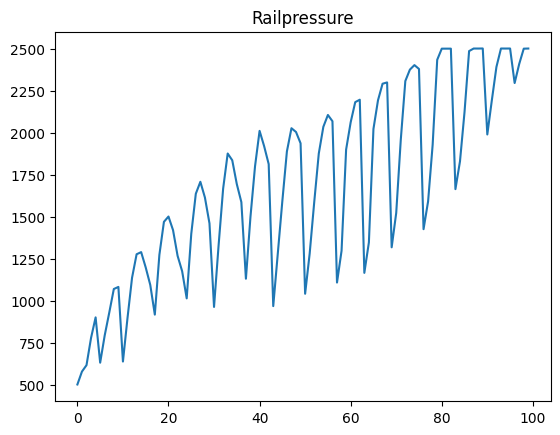

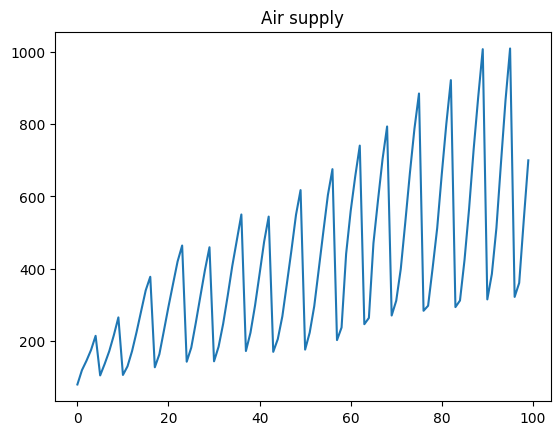

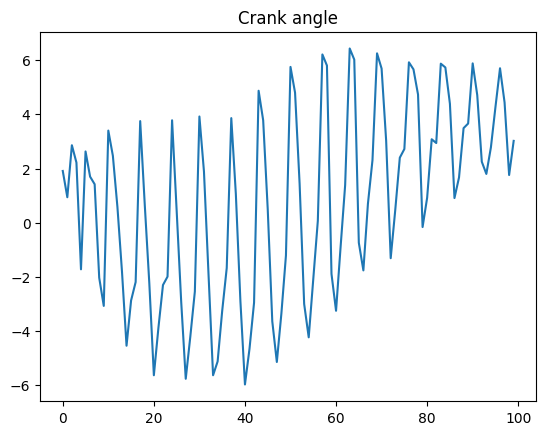

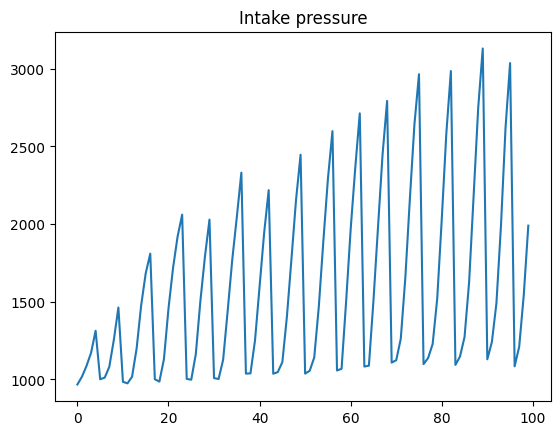

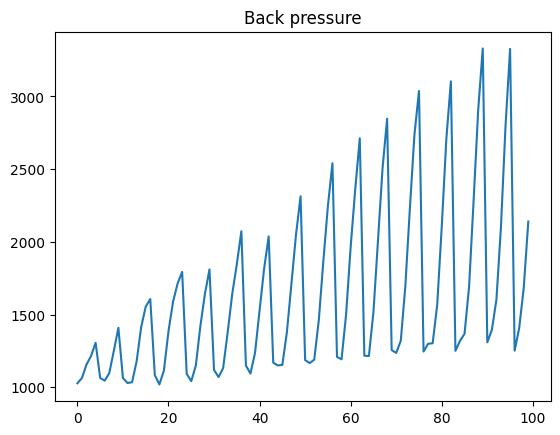

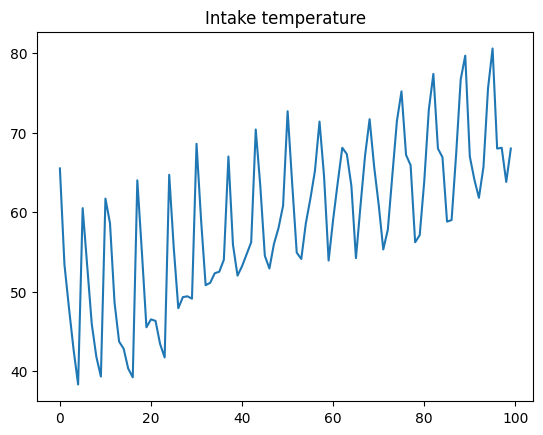

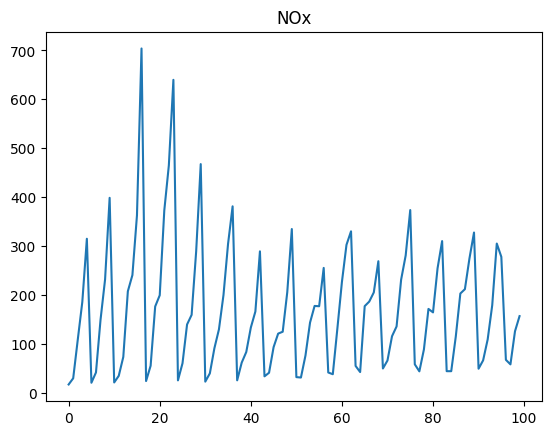

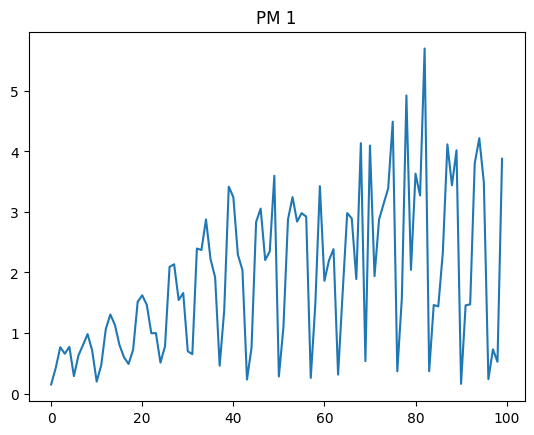

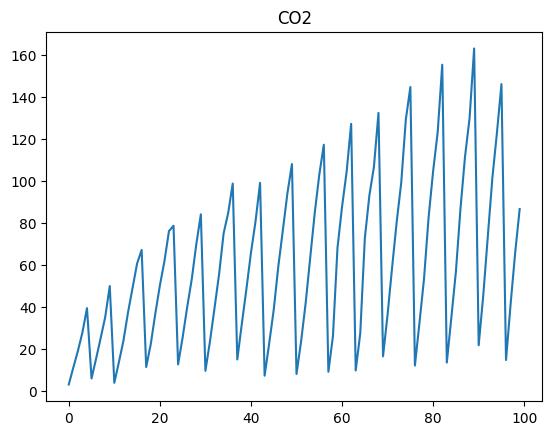

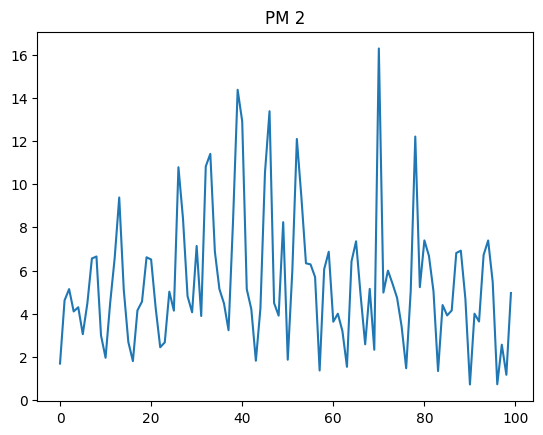

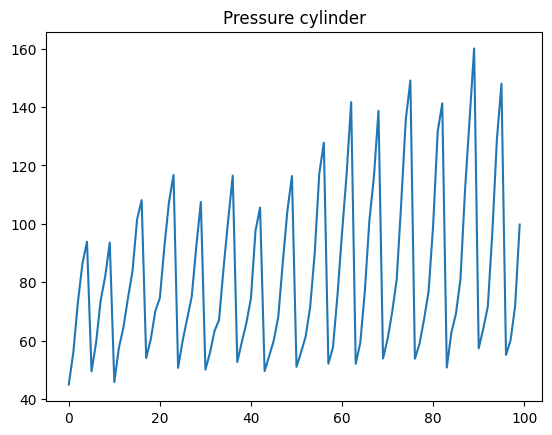

In [50]:
for feature in data:
    feature_data = data[feature]
    plt.title(feature)
    plt.plot(np.arange(len(feature_data)), feature_data)
    plt.show()

# Statistische Methoden
Kennzahlen und Z Wert

In [51]:
percentage_stds = {}

for feature in data:
    feature_data = data[feature]
    mean = np.mean(feature_data)
    std = np.std(feature_data)
    feature_max = (feature_data.max())
    feature_min = (feature_data.min())
    feature_range = feature_max - feature_min
    percentage_mean = mean / feature_max
    percentage_std = std / feature_range
    percentage_stds[feature] = percentage_std
    # print(f"Feature:\t{feature}")
    # print(f"max:\t{feature_max}")
    # print(f"min:\t{feature_min}")
    # #print(f"Range:\t{feature_range}")
    # print(f"Mean:\t{mean}")
    # print(f"Std:\t{std}")
    # print(f"percentage_mean:\t{percentage_mean}")
    # print(f"percentage_std:\t{percentage_std}")
    # print("\n")

for feature in percentage_stds:
    print(str(feature) + "\t" + str(percentage_stds[feature]))


Engine speed	0.29431653406192154
Engine load	0.30379490344426613
Railpressure	0.28290396751288555
Air supply	0.24198794989608247
Crank angle	0.2804526280388212
Intake pressure	0.27402012659788905
Back pressure	0.2526264662406756
Intake temperature	0.23237332961785925
NOx	0.1945967159513295
PM 1	0.23423711621134796
CO2	0.2505530567347916
PM 2	0.19562183079864878
Pressure cylinder	0.245937666437421


# Frequenzanalyse
Weil dass das einzige ist, was Simon kann lul

In [62]:
import torch

max_not_base_freq_percentage = {}

for feature in data:
    feature_data = data[feature]
    fft_feature_data = np.fft.rfft(feature_data)
    min_fft = fft_feature_data.min()
    range_fft = fft_feature_data.max() - min_fft
    #print(fft_feature_data)
    shifted_fft_data = abs((fft_feature_data - min_fft)/(range_fft))
    shifted_fft_data_max = 0
    for entry in shifted_fft_data[1:]:
        if entry > shifted_fft_data_max: shifted_fft_data_max = entry
    max_not_base_freq_percentage[feature] = (shifted_fft_data_max)

    # plt.title(feature)
    # plt.plot(np.arange(len(shifted_fft_data) - 1), shifted_fft_data[1:])
    # plt.show()


for feature in max_not_base_freq_percentage:
    print(str(feature) + "\t" + str(max_not_base_freq_percentage[feature]))

    

Engine speed	0.14702650708408221
Engine load	0.3416605844810161
Railpressure	0.11769996864152978
Air supply	0.25389254188301463
Crank angle	1.0
Intake pressure	0.20443738436050526
Back pressure	0.17549183381219052
Intake temperature	0.08174848754043147
NOx	0.28595060931243615
PM 1	0.3625553179650688
CO2	0.34382980402899566
PM 2	0.2697069061550401
Pressure cylinder	0.19280598162770468


# Glättung
ChefGPT hat das vorgeschlagen und ich hatte noch 25 min

In [75]:
def filter(x): 
    mean = np.mean(x) 
    std = np.std(x) 
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2)) 
    return y_out

[-0.08998873 -0.01116249  0.05379689  0.05379689 -0.01116249 -0.08998873]


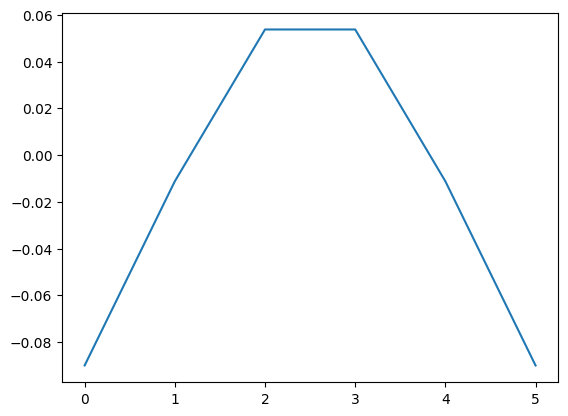

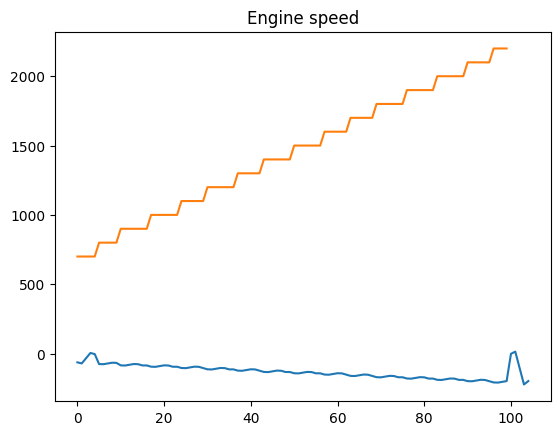

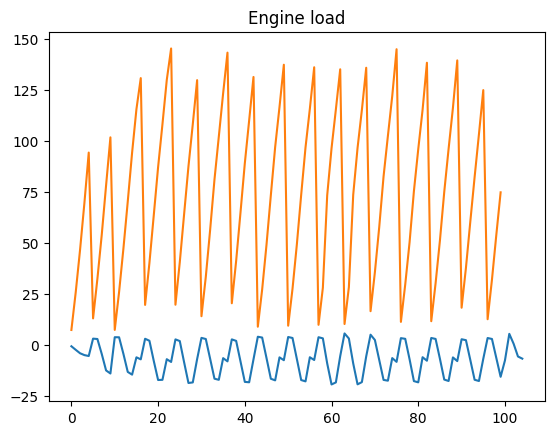

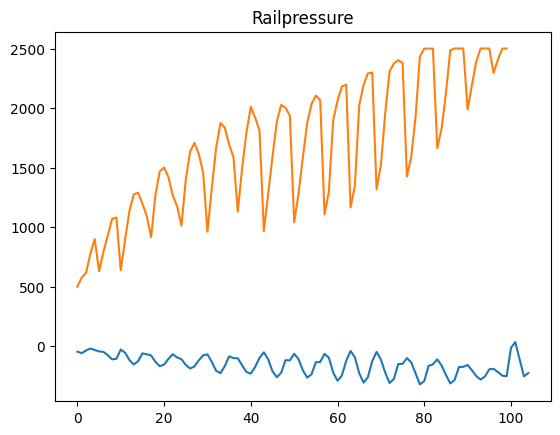

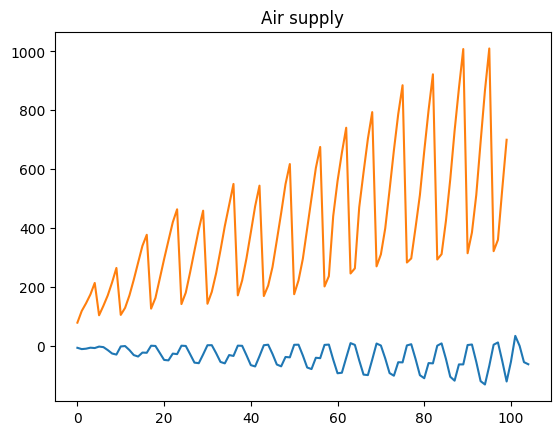

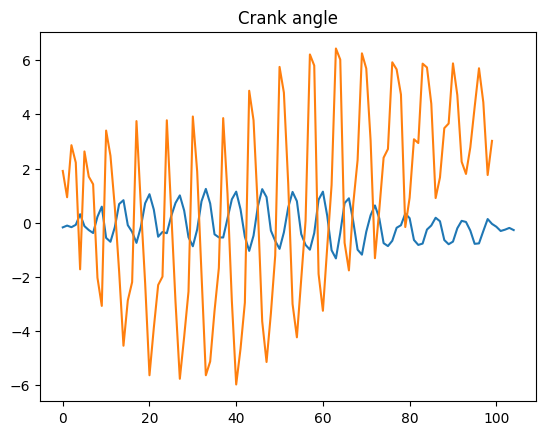

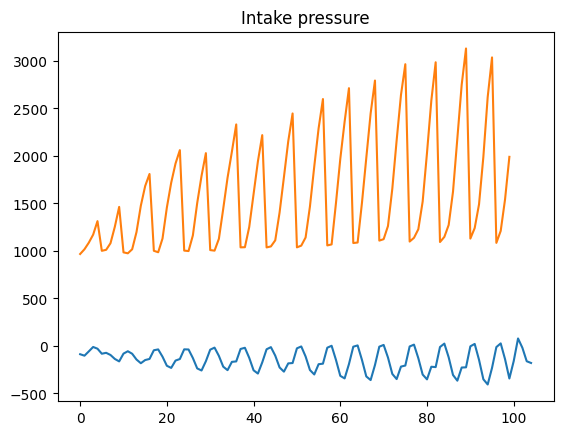

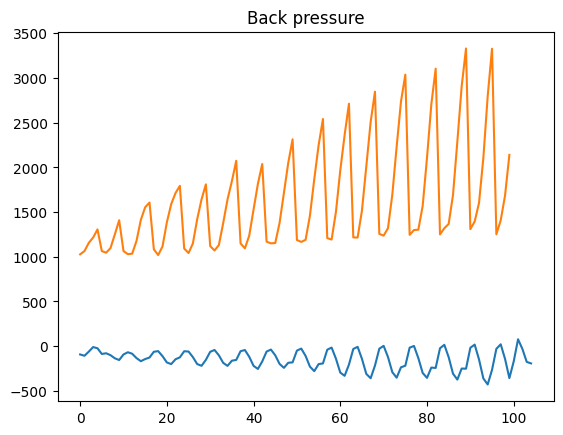

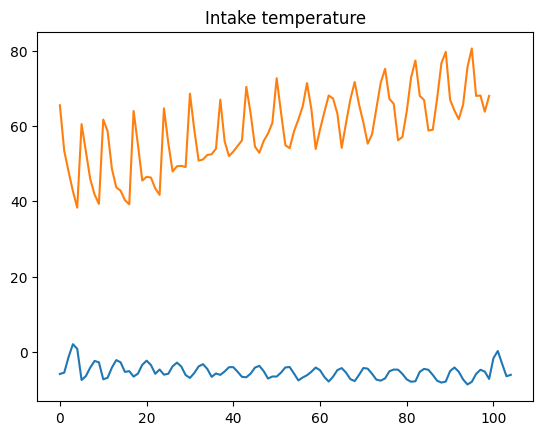

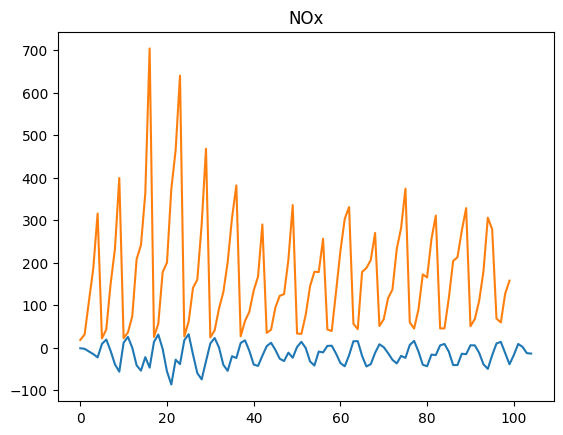

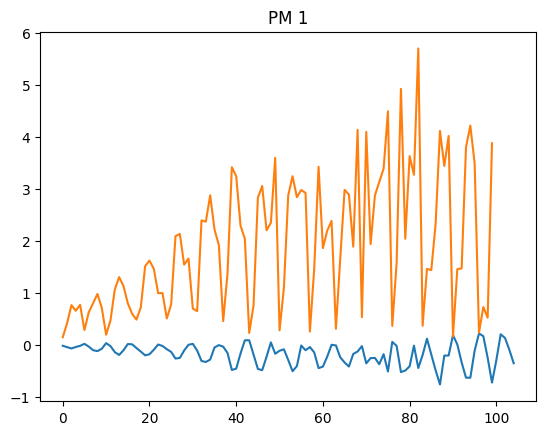

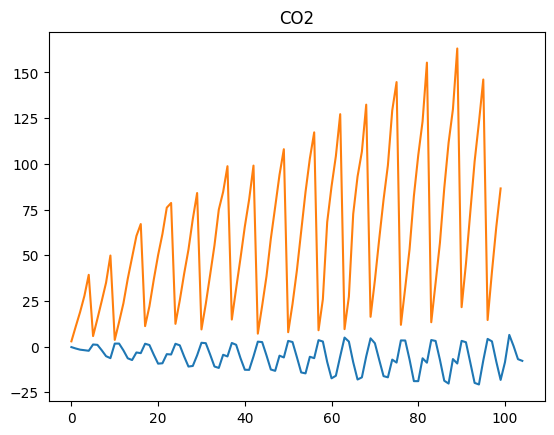

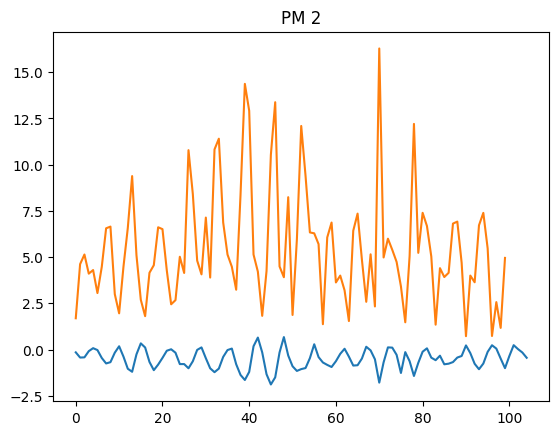

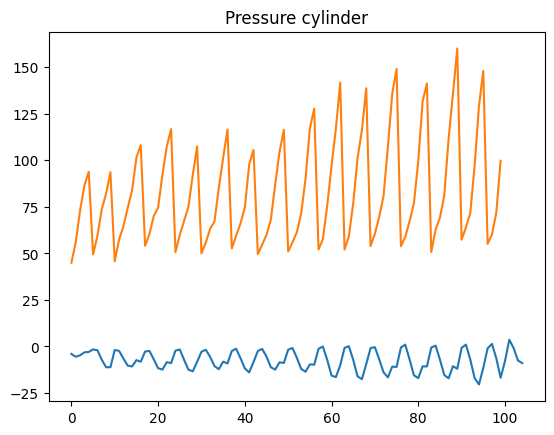

In [85]:
myfilter = filter(np.arange(-3, 3, 1))
myfilter -= 0.17

print(myfilter)

plt.plot(np.arange(len(myfilter)), myfilter)
plt.show()

for feature in data:
    feature_data = data[feature]

    convolutional_data = np.convolve(feature_data, myfilter)

    plt.title(feature)
    plt.plot(np.arange(len(convolutional_data)), convolutional_data, feature_data)
    plt.show()


# Final Results

In [92]:
print(f"{"Feature":<30}{"max_not_base_freq_percentage":<40}{"percentage_stds":<40}")
for feature in data:
    
    print(f"{feature:<30}{max_not_base_freq_percentage[feature]:<40.4}{percentage_stds[feature]:<40.4}")
    
    

Feature                       max_not_base_freq_percentage            percentage_stds                         
Engine speed                  0.147                                   0.2943                                  
Engine load                   0.3417                                  0.3038                                  
Railpressure                  0.1177                                  0.2829                                  
Air supply                    0.2539                                  0.242                                   
Crank angle                   1.0                                     0.2805                                  
Intake pressure               0.2044                                  0.274                                   
Back pressure                 0.1755                                  0.2526                                  
Intake temperature            0.08175                                 0.2324                                  
N